In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("data (2).csv")  # Make sure the CSV is in the same directory
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [2]:
# Step 1: Preprocessing

df.drop(['street', 'country', 'date'], axis=1, inplace=True)

In [3]:
# Label Encoding for categorical variables
le = LabelEncoder()
df['city'] = le.fit_transform(df['city'])
df['statezip'] = le.fit_transform(df['statezip'])


In [4]:
# Step 2: Correlation Analysis
corr = df.corr()
print("Top Correlations with Price:\n", corr['price'].sort_values(ascending=False))


Top Correlations with Price:
 price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_built         0.021857
city             0.018625
yr_renovated    -0.028774
statezip        -0.043385
Name: price, dtype: float64


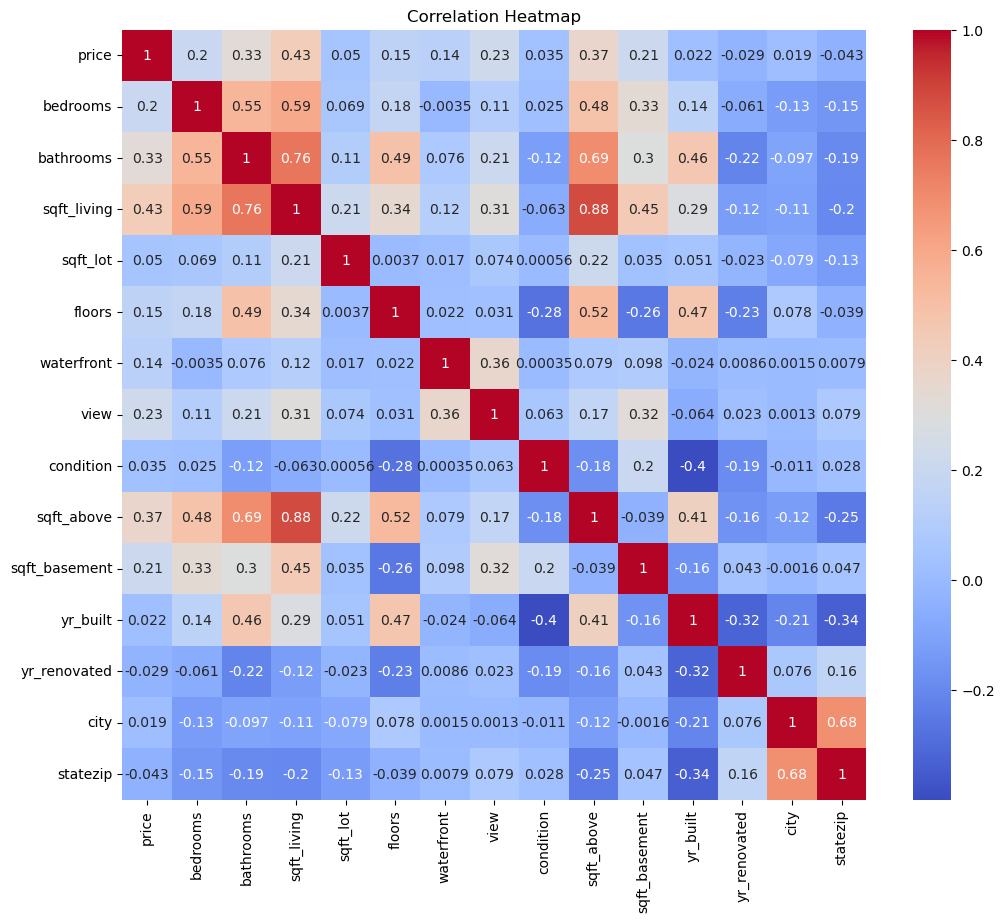

In [5]:
# Optional: Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [6]:
# Step 3: Remove Outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [7]:
# Step 4: Train/Test Split
X = df.drop("price", axis=1)
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Step 5: Train XGBoost Regressor
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [9]:
# Step 6: Predict and Evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)*100
print(f"✅ XGBoost R² Score: {r2:.4f}")


✅ XGBoost R² Score: 75.3504
